<a href="https://colab.research.google.com/github/richardcmg7/pln_1/blob/main/Actividad_G10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1: construir el etiquetador *morfosintáctico*

### Integrantes:

|   |   Integrantes                 |
|---|:-----------------------------:|
| 0 |  Leydi Milena Cortés Forero   |   
| 1 |  Ramón Rodriguez Angarita     |   
| 2 | Juan Sebastian Zapata Llano   |   
| 3 | Richard Camilo Saavedra Coneo |  

### Pseudocodigo 



1. Leer Linea -> Si linea esta vacia --asignar-- \<s\> 

2. Verificar si la linea tiene 4 argumentos
3. Si Arg_1 = "." Arg_2 = ".", Arg_3 = "Fp", Arg_2 = "0" --asignar-- \</s\> 
4. Tomar Argumento 1  y Argumento 3.
** Crear Diccionario Con la categoria gramarical a la que pertenece. Podriamos llamarlo Corpus etiquedo HMM.
6. Column 1 -> Argumento 1.
7. Correponde a un Tagset para español o una etiqueta no posicional?
8. Evalua la respectiva correspondencia de etiqueta (Puede ser una lista o diccionario creado con la información de Freeling).
9. Generar la columna 2 con la información 
** Generar el Bigrama con el corpus etiquetado HMM de los corpus brindados para la actividad
[Corpus para generar Bigrama](https://raw.githubusercontent.com/richardcmg7/hmm/master/corpus.txt)
10. Evaluar la probabilidad de ocurrencia de una etiqueta respecto a las otras etiquetas.
11. Evaluar la probabilidad de que una palabra corresponda a esa etiqueta en particular.

*** Realizar Pseudocodigo - algoritmo de Viterbi. **

¿ Se incluye en el HMM las etiquetes no posicionales y estas se incluyen en el bigrama generado?

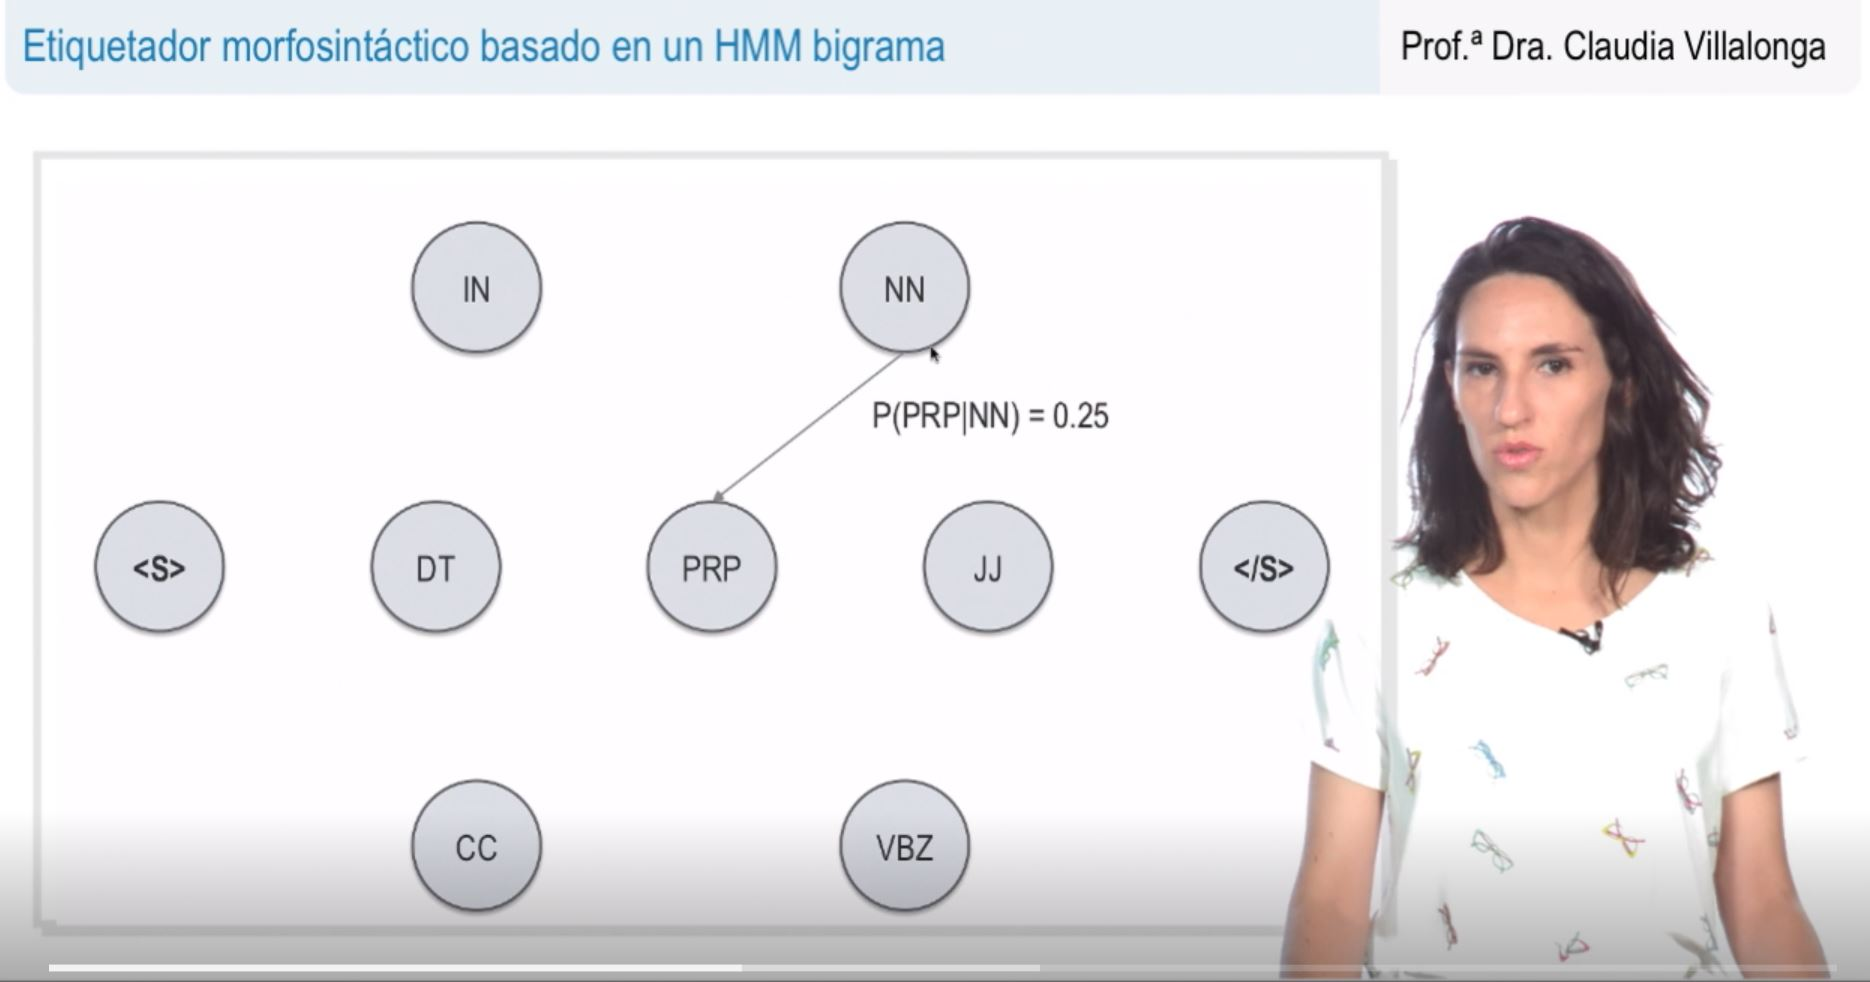

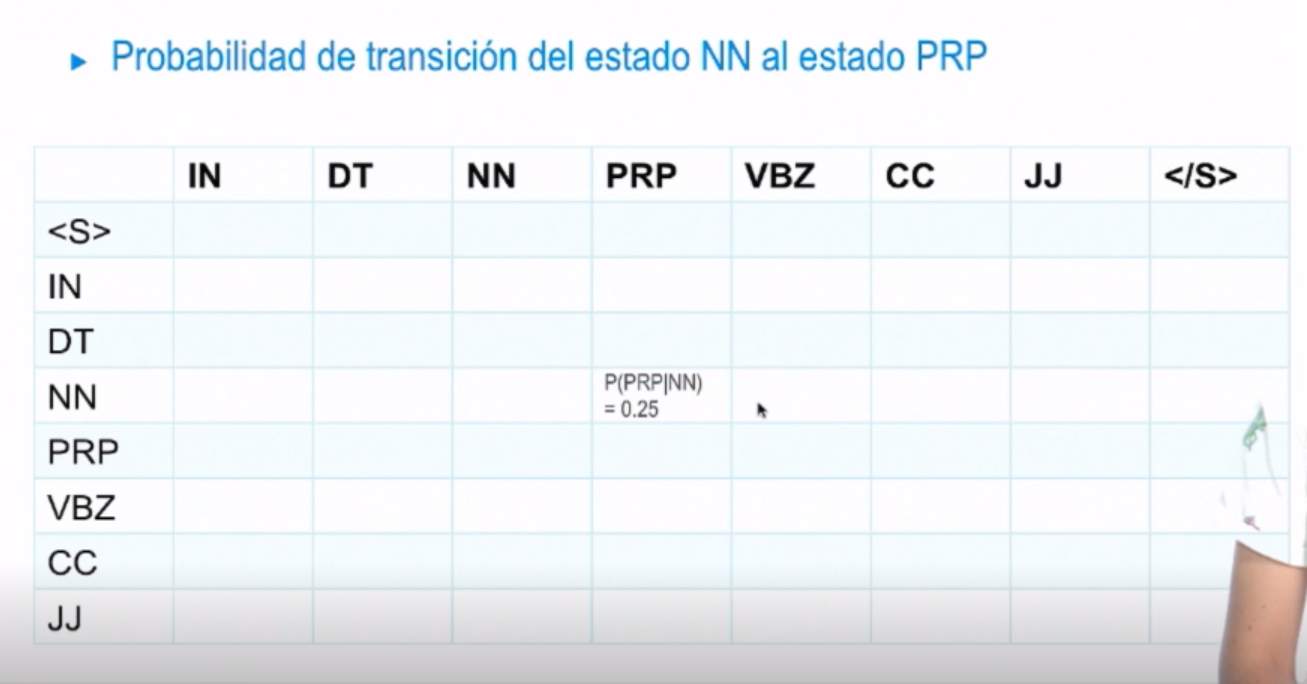

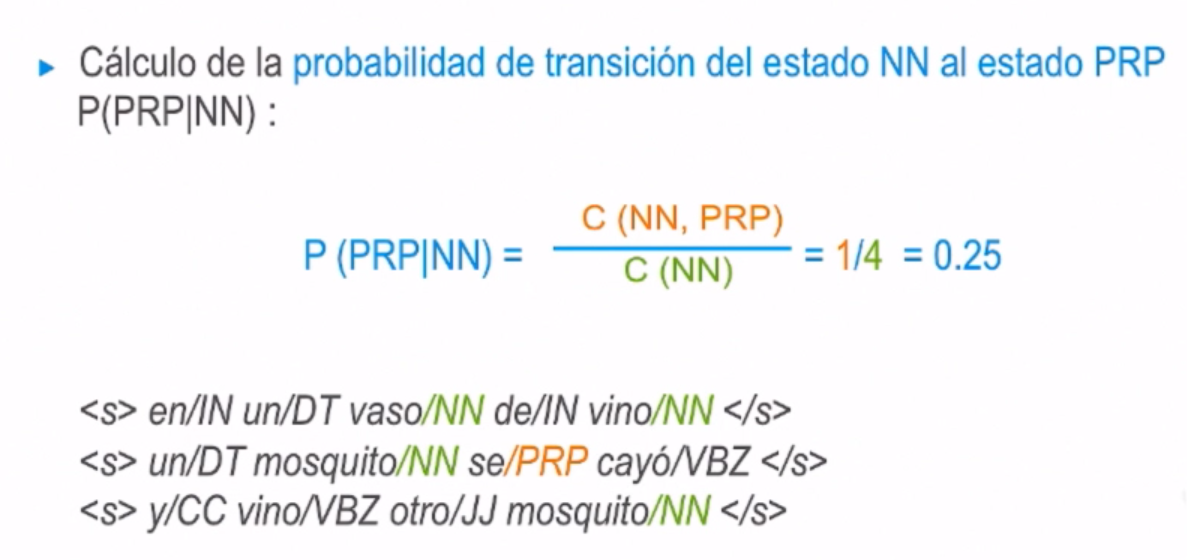

P(PRP|NN) = C(NN, PRP) / C(NN)

Numero de Veces que aparece NN seguido PRP / No de veces que aparece NN

### Inicio Código

#### Cargamos librerias




In [2]:
import numpy as np
import pandas as pd
import re 
output = pd.DataFrame

#### Cargamos el Corpus

In [3]:
! git clone https://github.com/richardcmg7/pln_1.git
!mv pln_1/corpus.txt texto.txt

Cloning into 'pln_1'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


#### Funciones básicas iniciales

In [4]:
def count_words(line):
    line = line.rstrip()
    words = line.split()
    return len(words)
    
def is_final_line(line):
    words = line.split()
    if (words[0] == "." and words[1] == "." and words[2] == "fp" and words[3] == "0"):
        return True
    else:
        return False

In [5]:
def word_label_dataframe(line):
    words = line.split()
    #save column1 word[0] and column2 letter_1_word[3]
    letter = words[2][0]
    data = [[words[0], letter]]
    return data


#### Intento Generar Bigrama usando Listas, arreglos **** No usado ***



In [ ]:
def word_label_p(line):
    words = line.split()
    #save column1 word[0] and column2 letter_1_word[3]
    if words[2][0] == 'f':
        letter = words[2]
    else:
        letter = words[2][0]
    data = [words[0], letter]
    return data


In [ ]:
def word_label(line):
    words = line.split()
    #save column1 word[0] and column2 letter_1_word[3]
    letter = words[2][0]
    data = [words[0], letter]
    return data

In [ ]:
word_label("que que cs prueba de y")

['que', 'c']

In [ ]:
#Leer el texto
def bigrama(file):
    salida = []
    f = open(file,'r')
    for line in f.readlines():
        line = line.lower()
        num_words = count_words(line)
        #print(num_words)
        if num_words == 0:
            data = ['','<s>']
            salida += data
        elif num_words == 4:
            if is_final_line(line) == True:
                salida += ['.','fp','','</s>']
            else:
                #data = word_label_p(line)          
                data = word_label(line)
                salida += data
        elif num_words == 1:
            pass
        
    print(salida)
    f.close()

In [ ]:
data = bigrama("texto.txt")

['', '<s>', 'tristana', 'n', 'es', 'v', 'una', 'd', 'película', 'n', 'de', 's', 'el', 'd', 'director', 'n', 'español', 'a', 'nacionalizado', 'v', 'mexicano', 'a', 'luis_buñuel', 'n', '.', 'fp', '', '</s>', '', '<s>', 'está', 'v', 'basada', 'v', 'en', 's', 'la', 'd', 'novela', 'n', 'de', 's', 'el', 'd', 'mismo', 'a', 'nombre', 'n', 'de', 's', 'benito_pérez_galdós', 'n', '.', 'fp', '', '</s>', '', '<s>', 'fue', 'v', 'nominada', 'v', 'a', 's', 'el', 'd', 'oscar', 'n', 'a', 's', 'la', 'd', 'mejor', 'a', 'película', 'n', 'de', 's', 'habla', 'n', 'no', 'r', 'inglesa', 'a', 'en', 's', '1970', 'z', '.', 'fp', '', '</s>', '', '<s>', '', '<s>', '', '<s>', 'en', 's', 'su', 'd', 'primer', 'a', 'viaje', 'n', 'el', 'd', 'comportamiento', 'n', 'desadaptado', 'v', 'y', 'c', 'agresivo', 'a', 'de', 's', 'cole', 'n', 'lleva', 'v', 'a', 's', 'que', 'c', 'sea', 'v', 'apresado', 'v', 'y', 'c', 'recluido', 'v', 'en', 's', 'un', 'd', 'centro_psiquiátrico', 'n', ',', 'f', 'acusado', 'v', 'de', 's', 'ser', 'v',

###  Función Generar Bigrama con DataFrame

In [7]:
#Leer el texto
def bigrama_dataframe(file):
    '''
    receive text of the corpus  .txt format
    Return dataframe with the lexicon and gramatical category

    '''
    salida = pd.DataFrame()
    f = open(file,'r')
    for line in f.readlines():
        line = line.lower()
        num_words = count_words(line)
        #print(num_words)
        if num_words == 0:
            data = [['','<s>']]
            salida = salida.append(data)
        elif num_words == 4:
            if is_final_line(line) == True:
                salida = salida.append([['.','f'],['','</s>']])
            else:
                #data = word_label_p(line)          
                data = word_label_dataframe(line)
                salida = salida.append(data)
        elif num_words == 1:
            pass
    salida.columns = ['texto','categoria']
    salida = salida.reset_index(drop=True) 
    f.close()
    return salida
    

### CREACIÓN VARIABLE CORPUS


In [9]:
corpus = bigrama_dataframe("texto.txt")
print(corpus)

        texto categoria
0                   <s>
1    tristana         n
2          es         v
3         una         d
4    película         n
..        ...       ...
528       los         d
529  síntomas         n
530         .         f
531                </s>
532                 <s>

[533 rows x 2 columns]


### Funcion categories -> Devuelve las categorias de un bigrama dado

In [10]:
def categories(corpus = corpus):
    '''
    args: corpus
    return: Uniques categories from corpus with "texto" and "categorias" columns
    '''
    categories = set(corpus['categoria'])
    categories = list(categories)
    categories = sorted(categories)
    return categories

categories(corpus)

['</s>', '<s>', 'a', 'c', 'd', 'f', 'n', 'p', 'r', 's', 'v', 'z']

### Función q_category -> Dataframe con categorias y cuantas veces se repite
 Recibe la variable corpus genera Dataframe con la cantidad de veces que se repite una categoria gramatical

In [13]:
def q_cat_to_dataframe(q_category):
    '''
    Args:   Category as an index and the values of each category
    Return: Dataframe with Gramatical Categories and Numbers of time repeated
            CSV categories_repeated.csv

    '''
    df = pd.DataFrame(q_category)
    df['value'] = df['categoria']
    df = df.drop(columns=['categoria'])
    df.reset_index(level=0, inplace=True)
    df.columns = ['category','quantity']
    return df

def q_category(corpus):
    '''
    Args: Corpus 
    return: Dataframe with Numbers of times a Category repeat
    '''
    quantity_category = pd.DataFrame(corpus)
    quantity_category = corpus["categoria"].value_counts()
    #quantity_category = q_cat_to_dataframe(quantity_category)
    quantity_category.to_csv('categories_repeated.csv')
    return quantity_category

#quantity_category = q_category(corpus)
#quantity_category

#### Funcion extract_val -> Retorna el número veces que aparece una etiqueta en el corpus

In [14]:
def extract_val(value, quantity_category = q_category(corpus)):
    '''Return the numbers of times an especific gramatical label occurred in corpus
    extract_val('</s>', quantity_category)
    '''
    if value in quantity_category:
        quantity = quantity_category.loc[value]
        return quantity

#extract_val('s')
# quantity_category['f']

## Probabilidad de transición


#### Función comb -> Dataset formado con la transición de etiquetas

In [19]:
def comb_to_dataframe(comb):
    
    df_matrix = pd.DataFrame(comb)
    df_matrix['value'] = df_matrix[0]
    df_matrix = df_matrix.drop(columns=[0])
    df_matrix.reset_index(level=0, inplace=True)
    df_matrix.columns = ['name','value']
    #df_matrix.set_index('name', inplace = True)
    return df_matrix

def comb(datos): 
    '''
    Args: 
    dataset with to columns with "texto" and "categoria" variable corpus
    Return:  
    the dataset with combination of sequential labels of corpus
    print(comb(corpus))
    '''
    serie = datos.iloc[:, 1] # Segunda columna
    comb = []
    for p in range(0,len(serie)-1):
        var = (serie[p] + serie[p+1])
        comb += [var]
    comb = pd.DataFrame(comb)
    comb = comb.value_counts()
    comb_dataframe = comb_to_dataframe(comb)
    return comb_dataframe

#### Función Frecuencia de par de etiquetas
def sequence(name, data = comb(corpus)):
    '''
        Args: name = transition, data =  Transition counts
        Return: Values of number times Transition occurs
    '''
    if name in list(data['name']):
        return df_comb[df_comb['name'] == name]['value']
    else:
        return 0

### Aproximación 1

#### Matriz de Transición


In [ ]:
df_matrix = comb(corpus)
list_name = df_matrix['name']
#type(list_name)
first = []
for i,v in list_name.items():
    if ( '</s>' in v):
       var = '</s>' 

    elif ( '<s>' in v):
        var = '<s>'
    
    else:
        var = v[0]

    first += [var]
#generar una función para la matrix de probabilidades
df_matrix['f_word'] = first
df_matrix['f_word_c'] = [extract_val(row) for row in df_matrix['f_word']]
df_matrix['prob'] = df_matrix['value'] / df_matrix['f_word_c']
df_matrix.to_csv('matriz_prob.csv')
print(df_matrix)

   name  value f_word  f_word_c      prob
0    dn     52      d        69  0.753623
1    sd     40      s        68  0.588235
2    nf     30      n       105  0.285714
3    ns     25      n       105  0.238095
4    pv     21      p        30  0.700000
..  ...    ...    ...       ...       ...
74   nz      1      n       105  0.009524
75   nr      1      n       105  0.009524
76   fa      1      f        48  0.020833
77   ds      1      d        69  0.014493
78   zr      1      z         5  0.200000

[79 rows x 5 columns]


#### Función para hallar la probabilidad de transición Aproximación 1

In [ ]:
def p_trans(value, matrix = df_matrix):
    return matrix[matrix['name'] == value]['prob'][0]

#val = p_trans('dn')
#val = 10 + val
#val

0.7536231884057971

En nuestro analisis existen doce etiquetas por lo que la matriz tendria 144 valores posibles.
Los valores que no estan en la matriz se consideran que valen 0

### Aproximación 2  OK


In [21]:
tags = categories(corpus)
num_tags = len(tags)
transition_matrix = np.zeros((num_tags, num_tags))

# rows
for i in range(num_tags):
    for j in range(num_tags):
        tag_tuple = tags[i]+tags[j]
        transition_matrix[i, j] =   sequence(tag_tuple)

def print_matrix(matrix):
    print(pd.DataFrame(matrix, index= tags, columns= tags))

print_matrix(transition_matrix)

      </s>   <s>    a     c     d     f     n    p    r     s     v    z
</s>   0.0  16.0  0.0   0.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0
<s>    0.0   8.0  0.0   1.0   0.0   0.0   3.0  0.0  3.0   6.0   3.0  0.0
a      0.0   0.0  0.0   6.0   0.0   4.0   9.0  0.0  1.0   6.0   2.0  0.0
c      0.0   0.0  2.0   1.0   5.0   0.0   6.0  9.0  4.0   3.0   8.0  2.0
d      0.0   0.0  7.0   1.0   1.0   0.0  52.0  4.0  0.0   1.0   3.0  0.0
f     16.0   0.0  1.0   6.0   5.0   3.0   8.0  0.0  0.0   4.0   5.0  0.0
n      0.0   0.0  9.0   8.0   2.0  30.0   3.0  9.0  1.0  25.0  17.0  1.0
p      0.0   0.0  0.0   0.0   0.0   1.0   0.0  4.0  3.0   1.0  21.0  0.0
r      0.0   0.0  4.0   3.0   1.0   2.0   1.0  0.0  2.0   3.0   4.0  0.0
s      0.0   0.0  0.0   4.0  40.0   0.0  16.0  2.0  0.0   0.0   5.0  1.0
v      0.0   0.0  5.0  10.0  15.0   7.0   4.0  2.0  5.0  19.0  11.0  1.0
z      0.0   0.0  0.0   0.0   0.0   1.0   3.0  0.0  1.0   0.0   0.0  0.0


In [38]:
rows_sum = transition_matrix.sum(axis=1, keepdims=True)
transition_matrix = transition_matrix / rows_sum
def dataframe_matrix(matrix = transition_matrix):
    return pd.DataFrame(matrix, index= tags, columns= tags)
dataframe_matrix()

,</s>,<s>,a,c,d,f,n,p,r,s,v,z
</s>,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
<s>,0.000000,0.333333,0.000000,0.041667,0.000000,0.000000,0.125000,0.000000,0.125000,0.250000,0.125000,0.000000
a,0.000000,0.000000,0.000000,0.214286,0.000000,0.142857,0.321429,0.000000,0.035714,0.214286,0.071429,0.000000
c,0.000000,0.000000,0.050000,0.025000,0.125000,0.000000,0.150000,0.225000,0.100000,0.075000,0.200000,0.050000
d,0.000000,0.000000,0.101449,0.014493,0.014493,0.000000,0.753623,0.057971,0.000000,0.014493,0.043478,0.000000
f,0.333333,0.000000,0.020833,0.125000,0.104167,0.062500,0.166667,0.000000,0.000000,0.083333,0.104167,0.000000
n,0.000000,0.000000,0.085714,0.076190,0.019048,0.285714,0.028571,0.085714,0.009524,0.238095,0.161905,0.009524
p,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.133333,0.100000,0.033333,0.700000,0.000000
r,0.000000,0.000000,0.200000,0.150000,0.050000,0.100000,0.050000,0.000000,0.100000,0.150000,0.200000,0.000000
s,0.000000,0.000000,0.000000,0.058824,0.588235,0.000000,0.235294,0.029412,0.000000,0.000000,0.073529,0.014706


#### Función para hallar la probabilidad de transición

In [24]:
def p_trans_(past, current, matrix = dataframe_matrix()):
    return matrix[current][past]
#p_trans_('a','<s>')
#val = p_trans_('<s>','c')
#val

## Probabilidad de emisión





### Explicación

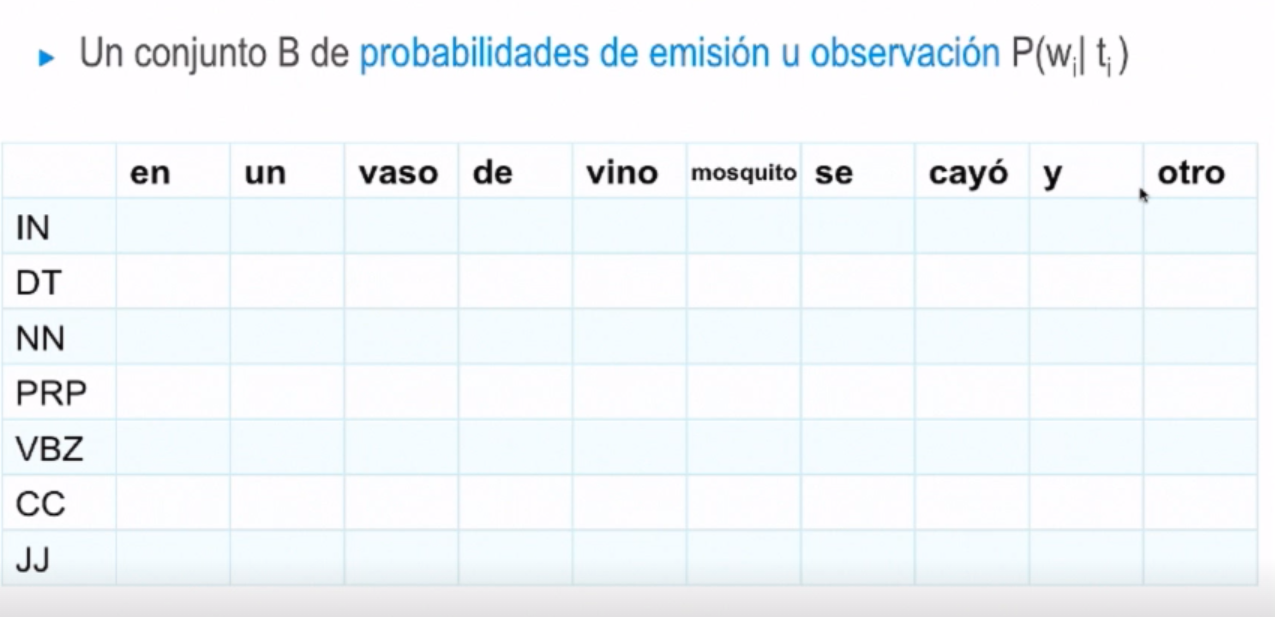

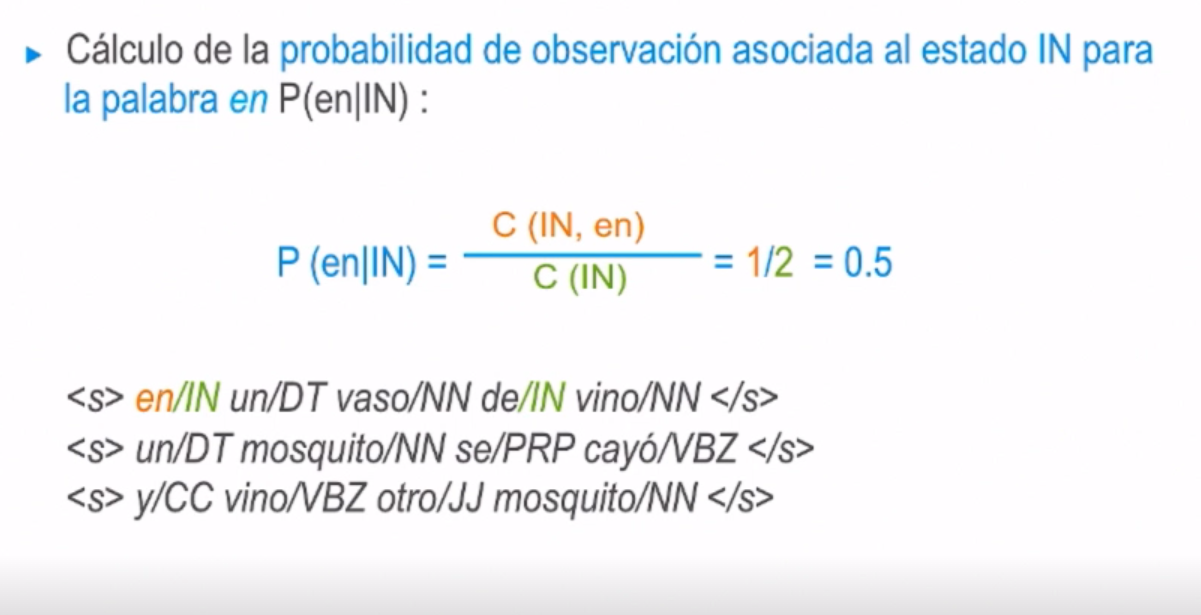

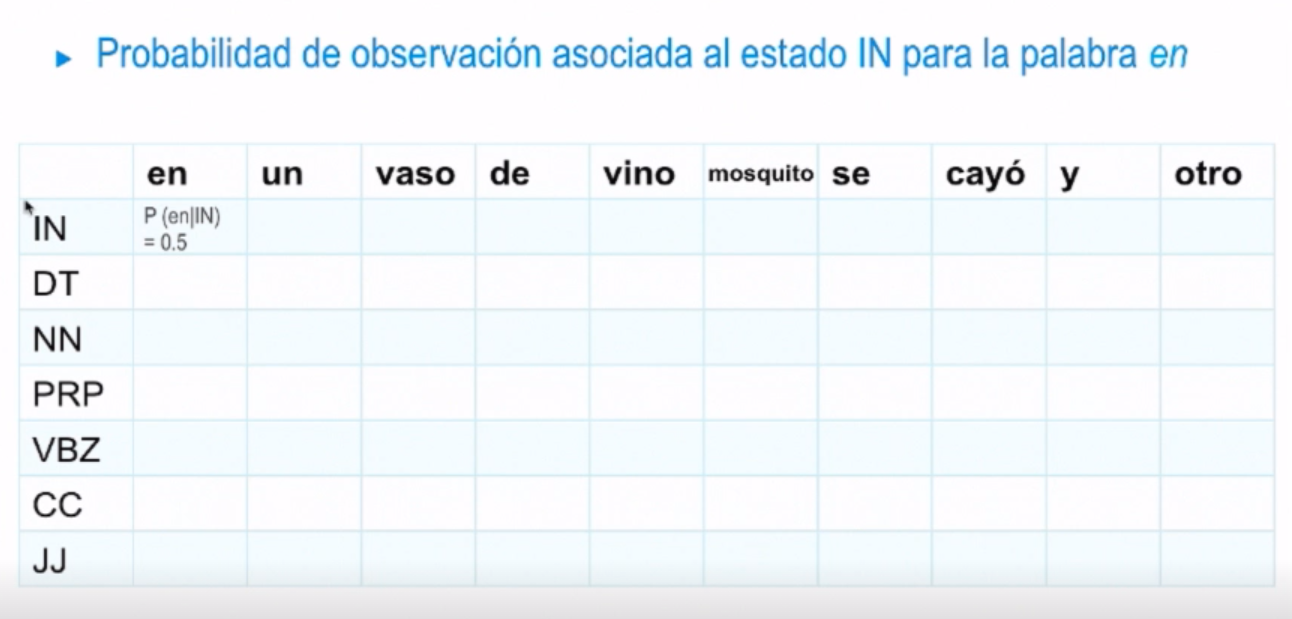

### Probabilidad de que una palabra corresponda a una categoria especifica

In [25]:
corpus_clean = corpus
corpus['texto+categoria'] = corpus['texto'] + corpus['categoria']
corpus_clean = corpus_clean.drop(corpus_clean[corpus_clean['categoria']== '<s>'].index)
corpus_clean = corpus_clean.drop(corpus_clean[corpus_clean['categoria']== '</s>'].index)
# corpus_clean = corpus_clean.drop(corpus_clean[corpus_clean['categoria']== 'f'].index)
# corpus_clean = corpus_clean.drop(corpus_clean[corpus_clean['categoria']== 'z'].index)
print(corpus_clean)
corpus1 = corpus_clean['texto+categoria'] 
corpus_c_word = corpus1.value_counts()
print(corpus_c_word)

        texto categoria texto+categoria
1    tristana         n       tristanan
2          es         v             esv
3         una         d            unad
4    película         n       películan
5          de         s             des
..        ...       ...             ...
526         ,         f              ,f
527  debido_a         s       debido_as
528       los         d            losd
529  síntomas         n       síntomasn
530         .         f              .f

[492 rows x 3 columns]
des               25
eld               25
,f                19
yc                17
.f                16
                  ..
grupon             1
capítulosn         1
bovingdon_bugn     1
puesc              1
envenenandov       1
Name: texto+categoria, Length: 242, dtype: int64


#### Funcion words_s 
Cantidad de veces que una palabra se asocia a una categoria

#### Aproximación 1

In [26]:
def corpus_to_dataframe(words):
    '''
        list to dataframe words corpus
    '''
    df_corpus_t_c = pd.DataFrame(words)
    df_corpus_t_c['value'] = df_corpus_t_c[0]
    df_corpus_t_c.reset_index(level=0, inplace=True)
    df_corpus_t_c = df_corpus_t_c.drop(columns=[0])
    return df_corpus_t_c

def words(corpus):
    '''
    receive the corpus_c_word
    return words_dataframe
    '''
    corpus_t_c = corpus['texto+categoria']
    corpus_t_c = pd.DataFrame(corpus_t_c)
    corpus_t_c = corpus_t_c.value_counts()
    words_dataframe = corpus_to_dataframe(corpus_t_c)
    # words_dataframe = words_dataframe.drop([0],axis=0)
    return words_dataframe
words(corpus_clean)
#corpus_to_dataframe(words_dataframe)

,texto+categoria,value
0,eld,25
1,des,25
2,",f",19
3,yc,17
4,.f,16
...,...,...
237,relaciónn,1
238,repentinamenter,1
239,requeríanv,1
240,llevav,1


#### Aproximación 2 OK

In [28]:
def words_s(corpus):
    '''
    receive the corpus_c_word
    return words_dataframe
    '''
    corpus_t_c = corpus.value_counts().reset_index()
    corpus_t_c['value'] = corpus_t_c[0]
    corpus_t_c = corpus_t_c.drop(columns=[0])
    return corpus_t_c
words_s(corpus_clean)


,texto,categoria,texto+categoria,value
0,el,d,eld,25
1,de,s,des,25
2,",",f,",f",19
3,y,c,yc,17
4,.,f,.f,16
...,...,...,...,...
237,relación,n,relaciónn,1
238,repentinamente,r,repentinamenter,1
239,requerían,v,requeríanv,1
240,lleva,v,llevav,1


## Matriz de probabilidad de emision
Presenta el valor de probabilidad de que dada una palabra esta pertenezca a una categoria específica


In [29]:
df_words_c = words_s(corpus_clean)
#df_words_c['categoria'] = [row[-1] for row in df_words_c['texto+categoria']]
df_words_c['val_categoria'] = [extract_val(row) for row in df_words_c['categoria']]
#df_words_c['Palabra'] = [row[:len(row)-1] for row in df_words_c['texto+categoria']]
df_words_c['prob_palabra'] = df_words_c['value'] / df_words_c['val_categoria']
df_words_c.to_csv('probabilidad_palabra.csv')
print(df_words_c)

              texto categoria  ... val_categoria  prob_palabra
0                el         d  ...            69      0.362319
1                de         s  ...            68      0.367647
2                 ,         f  ...            48      0.395833
3                 y         c  ...            40      0.425000
4                 .         f  ...            48      0.333333
..              ...       ...  ...           ...           ...
237        relación         n  ...           105      0.009524
238  repentinamente         r  ...            20      0.050000
239       requerían         v  ...            79      0.012658
240           lleva         v  ...            79      0.012658
241         llamado         v  ...            79      0.012658

[242 rows x 6 columns]


In [30]:
def p_emit(value, matrix = df_words_c):
    if value in list(matrix['texto+categoria']):
        return matrix[matrix['texto+categoria'] == value]['prob_palabra']
    else:
        return 0
#p_emit('mejora')

# Parte 2: Etiquetar morfosintácticamente una oración

En esta segunda parte de la actividad tienes que implementar en Python un programa que permita calcular la mejor secuencia de etiquetas para una oración, dicho de otro modo, realizar el etiquetado morfosintáctico de la oración. Para ello debes utilizar el etiquetador que has construido en la parte 1 de esta actividad y aplicar el algoritmo de Viterbi. La oración para la que se debe realizar el etiquetado mofosintáctico es: 
«Habla con el enfermo grave de trasplantes. ».

1. Leer la oración a analizar: "Habla con el enfermo grave de trasplantes."
2. tokenizar la oración
3. Crear la matriz de probabilidad de observación calculada a partir del corpus
que contiene esa tabla. 
por un lado las categorias y como columnas el texto tokenizado 
4. crear la matriz de probabilidad con el algoritmo de viterbi
una columna para cada observación t
una fila para cada estado Qi


## Inicio código

### Funcion para Tokenizar

#### Función utilizando Expresiones Regulares

In [31]:
def read_text(texto):
  '''
  Se lee el texto de la oración y se separa 
  '''
  texto = texto.lower()
  tokens = re.split(r'[\W\t\n]+',texto)
  #tokens_1 = re.split(r'(\w+)' ,texto)
  return tokens
tokens = read_text('Habla con el enfermo grave de trasplantes.')
tokens
#read_text('Habla con el enfermo grave de trasplantes')

['habla', 'con', 'el', 'enfermo', 'grave', 'de', 'trasplantes', '']

In [ ]:
# Valor esperado
#tokens = ['habla', 'con', 'el', 'enfermo', 'grave', 'de', 'trasplantes', '.']

#### Función utilizando NLTK

In [42]:
import nltk
nltk.download()
# Descargar (d), identifier>all, Salir(q) para instalar todas las bibliotecas

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> all
Command 'all' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package

True

In [35]:
def tokenizar(frase='Habla con el enfermo grave de trasplantes.'):
    frase = frase.lower()
    tokens = nltk.word_tokenize(frase)
    return (tokens)

print(tokenizar())

['habla', 'con', 'el', 'enfermo', 'grave', 'de', 'trasplantes', '.']


## Probabilidad de observación


In [36]:
def find_word_on_corpus_c_word(word, categoria):
    var = word+categoria
    try:
        q = corpus_c_word[var]
        return q
    except:
        return 0

def observation_probability_matrix(tokens): 
    q_categories = q_category(corpus)
    #q_categories = extract_val('s')
    #print(q_categories)
    df = pd.DataFrame()   
    # Set Index 
    index = categories(corpus)
    #index.remove('<s>')
    #index.remove('</s>')
    # Set Columns
    columns = (tokens)
    df = pd.DataFrame(columns=tokens,index=index)
    df.fillna(0)
    for c in df.columns:
        for i in df.index:
            df[c][i] = find_word_on_corpus_c_word(c, i) /extract_val(i)
    return df

data = observation_probability_matrix(tokenizar())
data

,habla,con,el,enfermo,grave,de,trasplantes,.
</s>,0,0,0,0,0,0,0,0
<s>,0,0,0,0,0,0,0,0
a,0,0,0,0.0357143,0.107143,0,0,0
c,0,0,0,0,0,0,0,0
d,0,0,0.362319,0,0,0,0,0
f,0,0,0,0,0,0,0,0.333333
n,0.00952381,0,0,0.0285714,0,0,0.0190476,0
p,0,0,0,0,0,0,0,0
r,0,0,0,0,0,0,0,0
s,0,0.0735294,0,0,0,0.367647,0,0


### Función probabilidad de emisión 

In [39]:
data = observation_probability_matrix(tokenizar())
def p_emit_obs(word, category, matrix = data):
    return matrix[word][category]
#val = p_emit_obs('habla','v')
#val

## Matriz de *Viterbi*

In [ ]:
tags = categories(corpus)
tags

['</s>', '<s>', 'a', 'c', 'd', 'f', 'n', 'p', 'r', 's', 'v', 'z']

In [ ]:
states = ("a", "c", "d", "f", "n", "p", "r", "s", "v", "z")
V = [{}]
for st in states:
        V[0][st] = {"prob": 1, "prev": None}
V[0][states[0]]['prob']

1

In [40]:
def Viterbi(obs, states):
    V = [{}]
    for st in states:
        V[0][st] = {"prob": 1 * p_emit_obs(obs[0], st) * p_trans_('<s>', st), "prev": None}

    for t in range(1,len(obs)):  #[['habla', 'con', 'el', 'enfermo', 'grave', 'de', 'trasplantes', '.']]
        V.append({})
        for st in states:    # [['</s>', '<s>', 'a', 'c', 'd', 'f', 'n', 'p', 'r', 's', 'v', 'z']]   
            # Determinar el valor de Viterbi         
            max_tr_prob = V[t - 1][states[0]]["prob"] * p_trans_(states[0],st)
            prev_st_selected = states[0]
           
            # Toma el valor de viterbi maximo
            for prev_st in states[1:]:
                tr_prob = V[t - 1][prev_st]["prob"] * p_trans_(prev_st,st)
                if tr_prob > max_tr_prob:
                    max_tr_prob = tr_prob
                    prev_st_selected = prev_st
                     
            # Guardar en el vector el valor de viterbi máximo y la respectiva etiqueta
            max_prob = max_tr_prob * p_emit_obs(obs[t],st)
            V[t][st] = {"prob": max_prob, "prev": prev_st_selected}
    print(V)     
    for line in dptable(V):
        print(line)

    opt = []
    max_prob = 0.0
    previous = None
    # Get most probable state and its backtrack
    for st, data in V[-1].items():
        if data["prob"] > max_prob:
            max_prob = data["prob"]
            best_st = st
    opt.append(best_st)
    previous = best_st
    #Follow the backtrack till the first observation
    for t in range(len(V) - 2, -1, -1):
        opt.insert(0, V[t + 1][previous]["prev"])
        previous = V[t + 1][previous]["prev"]
    print("***************************************")
    print('Los Pasos de estados son ' + ' '.join(opt) + ' con la mas alta probabilidad de %s' % max_prob)

def dptable(V):
    # Print a table of steps from dictionary
    yield " ".join(("%12d" % i) for i in range(len(V)))
    for state in V[0]:
        yield "%.7s: " % state + " ".join("%.7s" % ("%f" % v[state]["prob"]) for v in V)


In [41]:
data = observation_probability_matrix(tokenizar())
data
states = categories(corpus)
obs = tokenizar()
data = Viterbi(obs, states)
data

[{'</s>': {'prob': 0.0, 'prev': None}, '<s>': {'prob': 0.0, 'prev': None}, 'a': {'prob': 0.0, 'prev': None}, 'c': {'prob': 0.0, 'prev': None}, 'd': {'prob': 0.0, 'prev': None}, 'f': {'prob': 0.0, 'prev': None}, 'n': {'prob': 0.0011904761904761906, 'prev': None}, 'p': {'prob': 0.0, 'prev': None}, 'r': {'prob': 0.0, 'prev': None}, 's': {'prob': 0.0, 'prev': None}, 'v': {'prob': 0.006329113924050633, 'prev': None}, 'z': {'prob': 0.0, 'prev': None}}, {'</s>': {'prob': 0.0, 'prev': '</s>'}, '<s>': {'prob': 0.0, 'prev': '</s>'}, 'a': {'prob': 0.0, 'prev': 'v'}, 'c': {'prob': 0.0, 'prev': 'v'}, 'd': {'prob': 0.0, 'prev': 'v'}, 'f': {'prob': 0.0, 'prev': 'v'}, 'n': {'prob': 0.0, 'prev': 'v'}, 'p': {'prob': 0.0, 'prev': 'v'}, 'r': {'prob': 0.0, 'prev': 'v'}, 's': {'prob': 0.00011192587914832654, 'prev': 'v'}, 'v': {'prob': 0.0, 'prev': 'v'}, 'z': {'prob': 0.0, 'prev': 'v'}}, {'</s>': {'prob': 0.0, 'prev': '</s>'}, '<s>': {'prob': 0.0, 'prev': '</s>'}, 'a': {'prob': 0.0, 'prev': '</s>'}, 'c': {'

## Prueba Texto 2

In [ ]:
obs = tokenizar("enfermo grave habla de trasplantes.")
data = observation_probability_matrix(obs)
data

,enfermo,grave,habla,de,trasplantes,.
</s>,0,0,0,0,0,0
<s>,0,0,0,0,0,0
a,0.0357143,0.107143,0,0,0,0
c,0,0,0,0,0,0
d,0,0,0,0,0,0
f,0,0,0,0,0,0.333333
n,0.0285714,0,0.00952381,0,0.0190476,0
p,0,0,0,0,0,0
r,0,0,0,0,0,0
s,0,0,0,0.367647,0,0


In [ ]:
states = categories(corpus)
data = Viterbi(obs, states)
data

[{'</s>': {'prob': 0.0, 'prev': None}, '<s>': {'prob': 0.0, 'prev': None}, 'a': {'prob': 0.0, 'prev': None}, 'c': {'prob': 0.0, 'prev': None}, 'd': {'prob': 0.0, 'prev': None}, 'f': {'prob': 0.0, 'prev': None}, 'n': {'prob': 0.0035714285714285713, 'prev': None}, 'p': {'prob': 0.0, 'prev': None}, 'r': {'prob': 0.0, 'prev': None}, 's': {'prob': 0.0, 'prev': None}, 'v': {'prob': 0.0, 'prev': None}, 'z': {'prob': 0.0, 'prev': None}}, {'</s>': {'prob': 0.0, 'prev': '</s>'}, '<s>': {'prob': 0.0, 'prev': '</s>'}, 'a': {'prob': 3.279883381924198e-05, 'prev': 'n'}, 'c': {'prob': 0.0, 'prev': 'n'}, 'd': {'prob': 0.0, 'prev': 'n'}, 'f': {'prob': 0.0, 'prev': 'n'}, 'n': {'prob': 0.0, 'prev': 'n'}, 'p': {'prob': 0.0, 'prev': 'n'}, 'r': {'prob': 0.0, 'prev': 'n'}, 's': {'prob': 0.0, 'prev': 'n'}, 'v': {'prob': 0.0, 'prev': 'n'}, 'z': {'prob': 0.0, 'prev': 'n'}}, {'</s>': {'prob': 0.0, 'prev': '</s>'}, '<s>': {'prob': 0.0, 'prev': '</s>'}, 'a': {'prob': 0.0, 'prev': '</s>'}, 'c': {'prob': 0.0, 'prev'

<hr>
<h4 align="center"> Fin de la Actividad - Actividad Grupal </h4>
<p align="center"> Actividad : Etiquetado Morfosintactico <p>